# LENET ARCHITECTURE

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import warnings
warnings.filterwarnings('ignore')


2.15.0


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split = 0.2)
train_data=train.flow_from_directory(directory = 'DATASET/TRAIN',target_size=(224,224),
                                     batch_size=32,class_mode='categorical')

Found 2000 images belonging to 4 classes.


In [4]:
test=ImageDataGenerator(rescale=1./255)
test_data=test.flow_from_directory(directory = 'DATASET/TEST',target_size=(224,224),
                                   batch_size=32,class_mode='categorical')

Found 2000 images belonging to 4 classes.


In [5]:
MODEL=Sequential()
MODEL.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(3,3), input_shape=(224,224,3), padding=('valid'), activation='relu'))
MODEL.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
MODEL.add(Convolution2D(filters=128, kernel_size=(3,3), strides=(3,3), padding=('valid'), activation='relu'))
MODEL.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
MODEL.add(Flatten())
MODEL.add(Dense(256, activation='relu'))
MODEL.add(Dense(4, activation='softmax'))

OPT    = tensorflow.keras.optimizers.Adam(0.001)

MODEL.compile(optimizer=OPT,loss='categorical_crossentropy',metrics=["accuracy", tensorflow.keras.metrics.Precision(), tensorflow.keras.metrics.Recall()])
MODEL.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 74, 74, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 37, 37, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)              

In [6]:
model_path = "LENET.h5"

from tensorflow.keras.callbacks import ModelCheckpoint

M = ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

In [7]:
epochs = 100
batch_size = 32

# 

In [8]:
WORKING = MODEL.fit_generator(
           train_data, steps_per_epoch=train_data.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_data,validation_steps=test_data.samples // batch_size,
           callbacks=[M])

Epoch 1/100


62/62 [==============================] - ETA: 0s - loss: 0.9789 - accuracy: 0.5467 - precision: 0.6490 - recall: 0.3364
Epoch 1: accuracy improved from -inf to 0.54675, saving model to LENET.h5
62/62 [==============================] - 47s 747ms/step - loss: 0.9789 - accuracy: 0.5467 - precision: 0.6490 - recall: 0.3364 - val_loss: 0.6955 - val_accuracy: 0.6477 - val_precision: 0.6687 - val_recall: 0.6003
Epoch 2/100
62/62 [==============================] - ETA: 0s - loss: 0.6062 - accuracy: 0.6941 - precision: 0.7112 - recall: 0.6631
Epoch 2: accuracy improved from 0.54675 to 0.69411, saving model to LENET.h5
62/62 [==============================] - 55s 886ms/step - loss: 0.6062 - accuracy: 0.6941 - precision: 0.7112 - recall: 0.6631 - val_loss: 0.5230 - val_accuracy: 0.7203 - val_precision: 0.7250 - val_recall: 0.7137
Epoch 3/100
62/62 [==============================] - ETA: 0s - loss: 0.5570 - accuracy: 0.7033 - precision: 0.7079 - recall: 0.6895
Epoch 3: accuracy impro

In [9]:
WORKING.history.keys()


dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

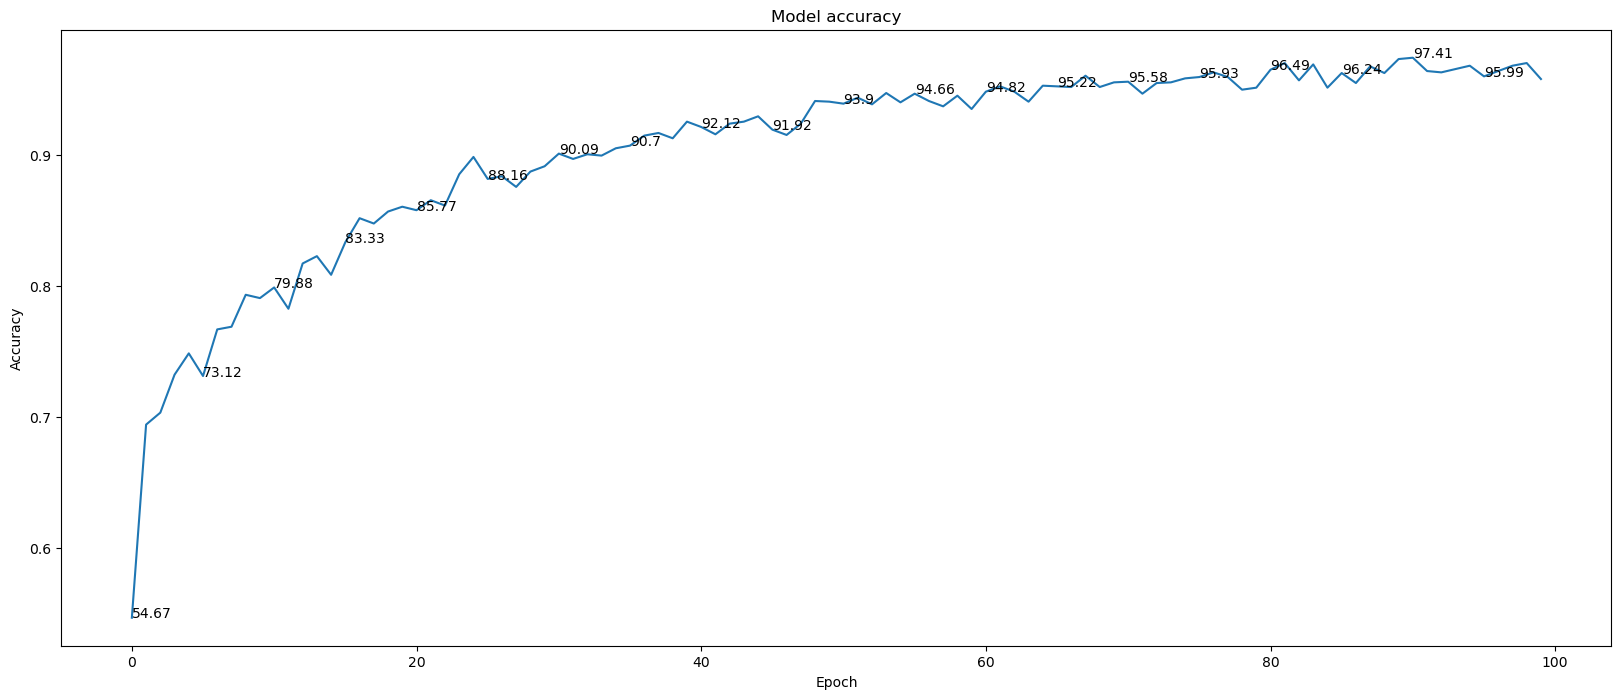

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))
plt.plot(WORKING.history['accuracy'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(WORKING.history['accuracy'][i]*100,2),xy=(i,WORKING.history['accuracy'][i]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

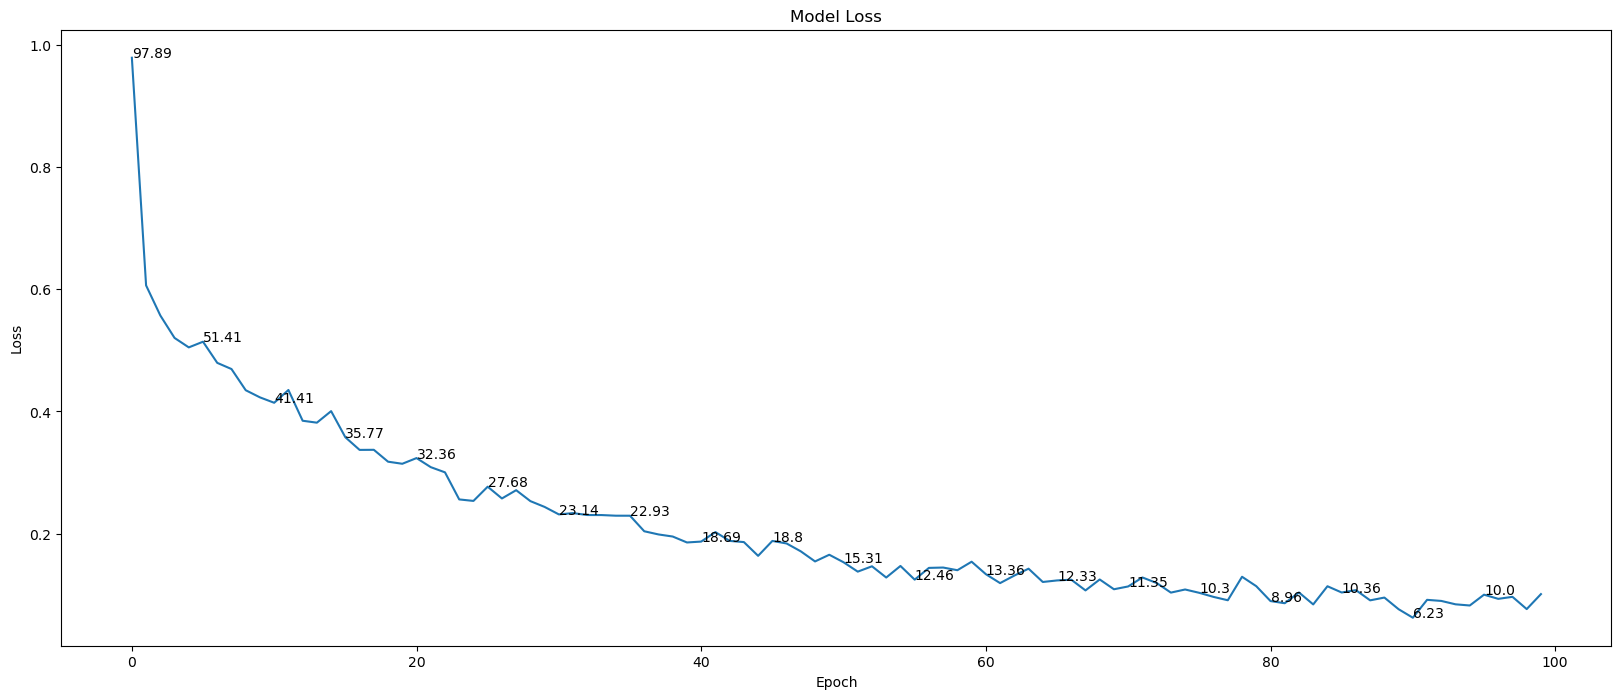

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(WORKING.history['loss'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(WORKING.history['loss'][i]*100,2),xy=(i,WORKING.history['loss'][i]))

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

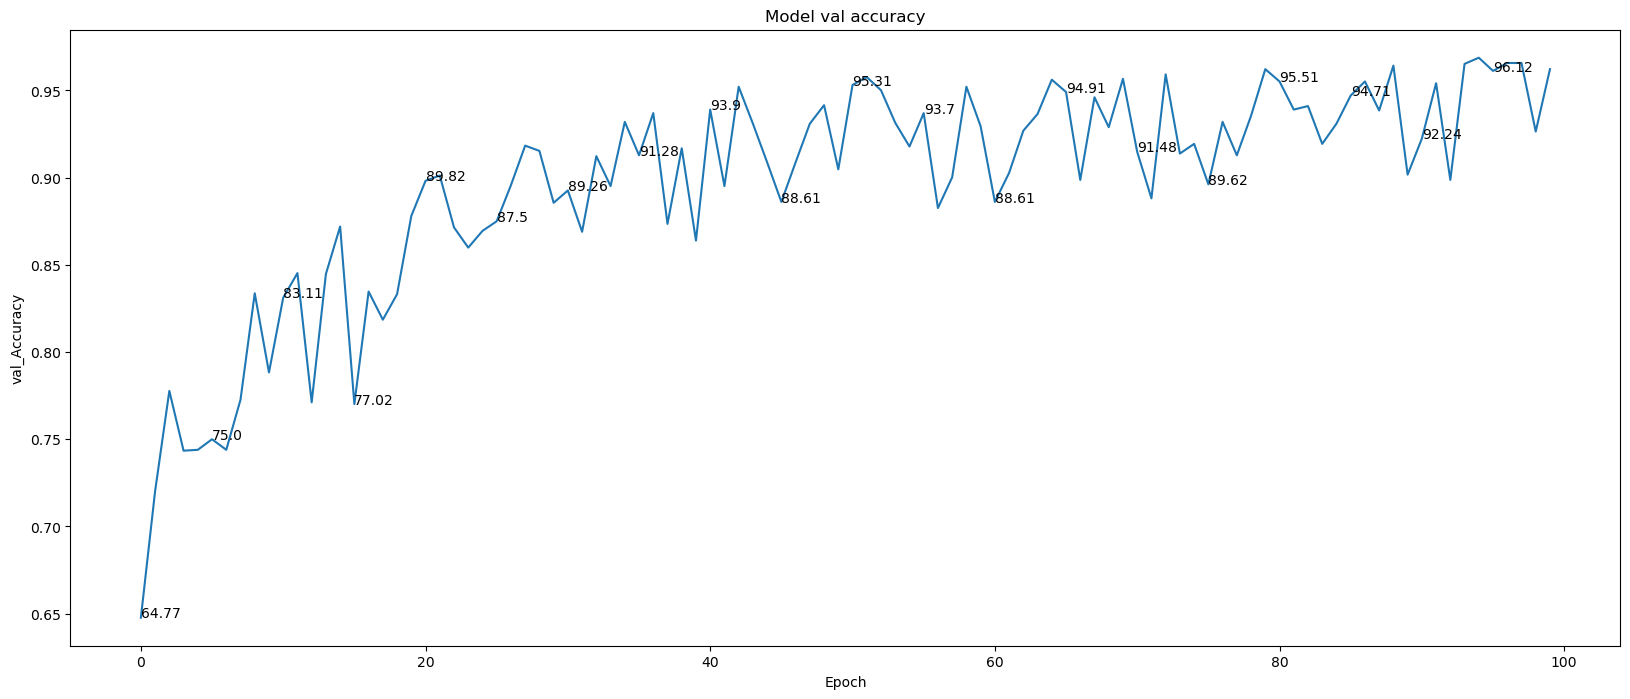

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))
plt.plot(WORKING.history['val_accuracy'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(WORKING.history['val_accuracy'][i]*100,2),xy=(i,WORKING.history['val_accuracy'][i]))

plt.title('Model val accuracy')
plt.ylabel('val_Accuracy')
plt.xlabel('Epoch')
plt.show()

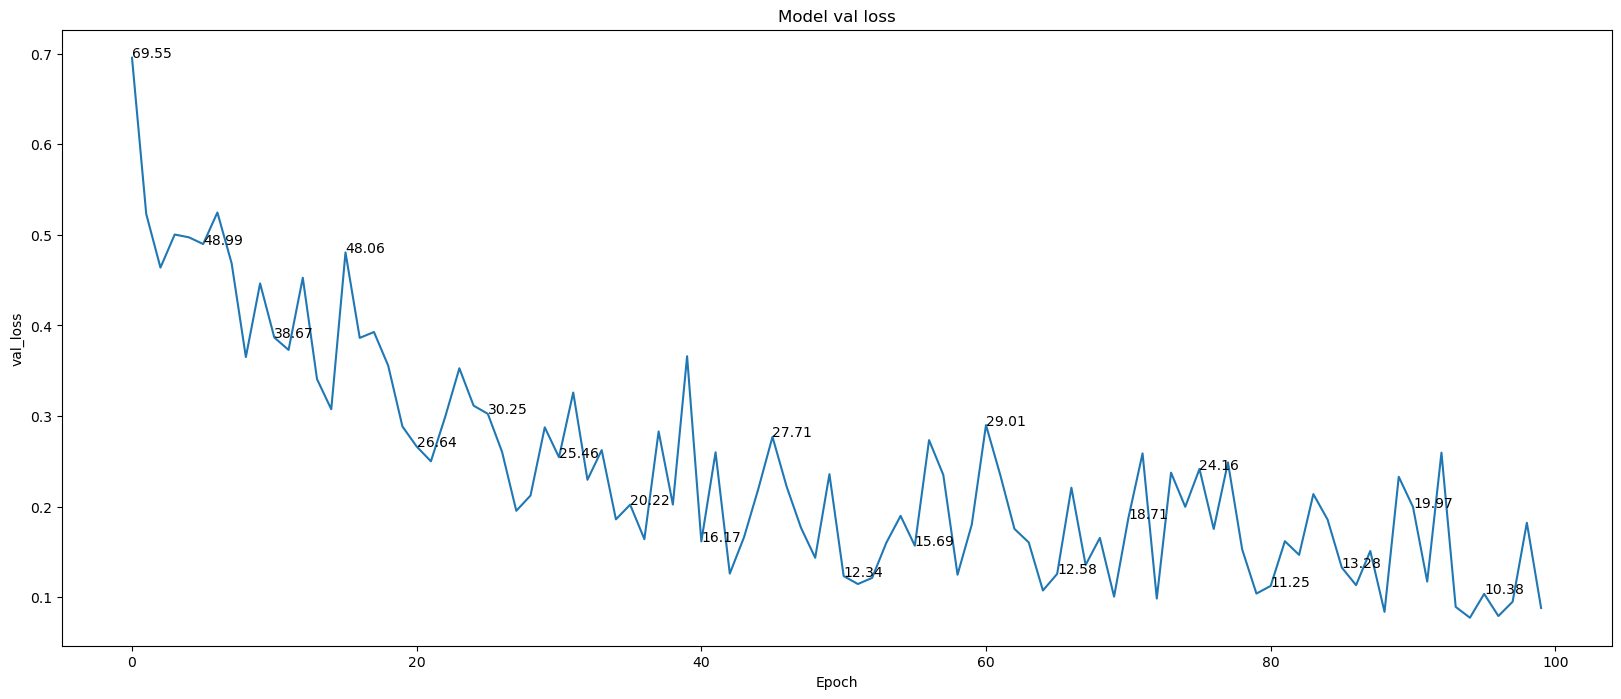

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))
plt.plot(WORKING.history['val_loss'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(WORKING.history['val_loss'][i]*100,2),xy=(i,WORKING.history['val_loss'][i]))

plt.title('Model val loss')
plt.ylabel('val_loss')
plt.xlabel('Epoch')
plt.show()

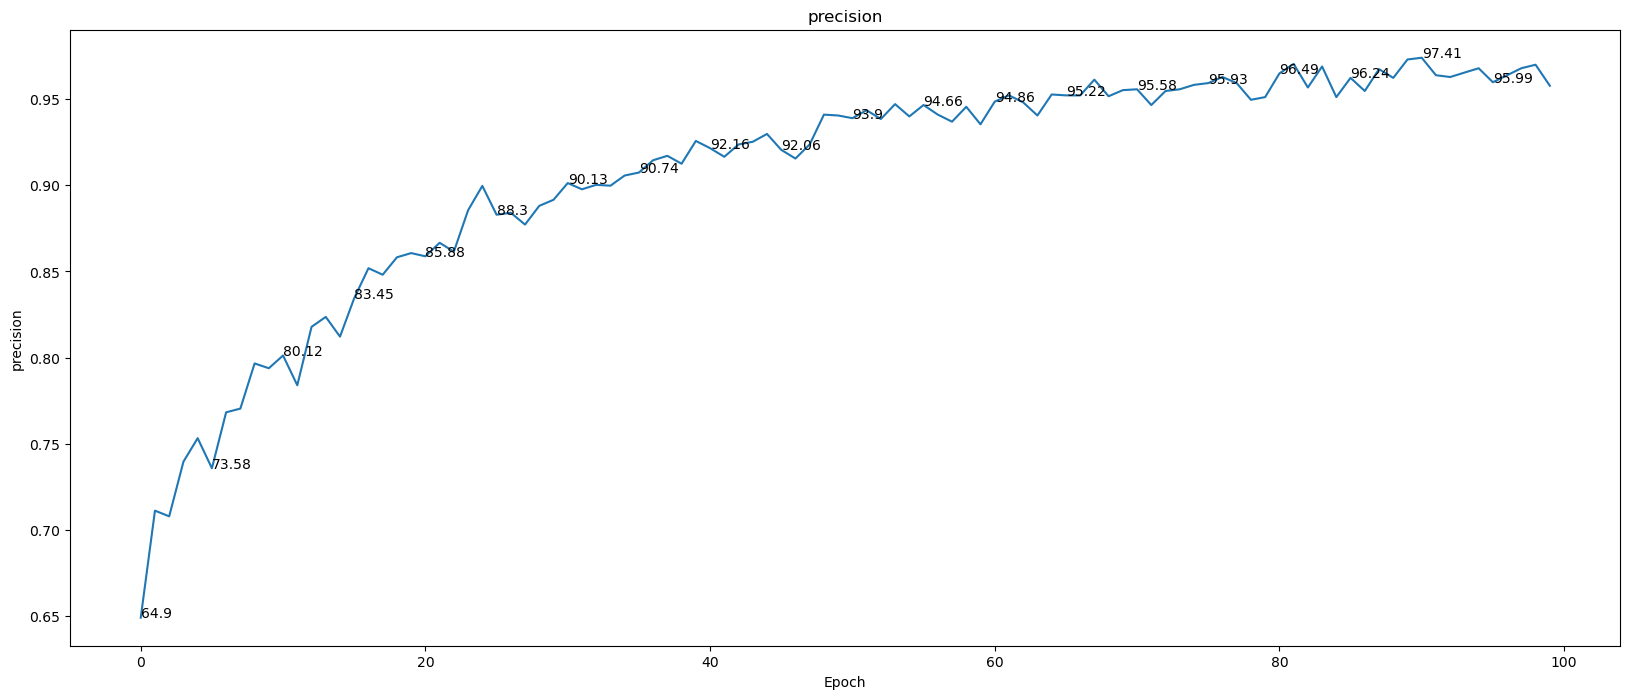

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))
plt.plot(WORKING.history['precision'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(WORKING.history['precision'][i]*100,2),xy=(i,WORKING.history['precision'][i]))

plt.title('precision')
plt.ylabel('precision')
plt.xlabel('Epoch')
plt.show()

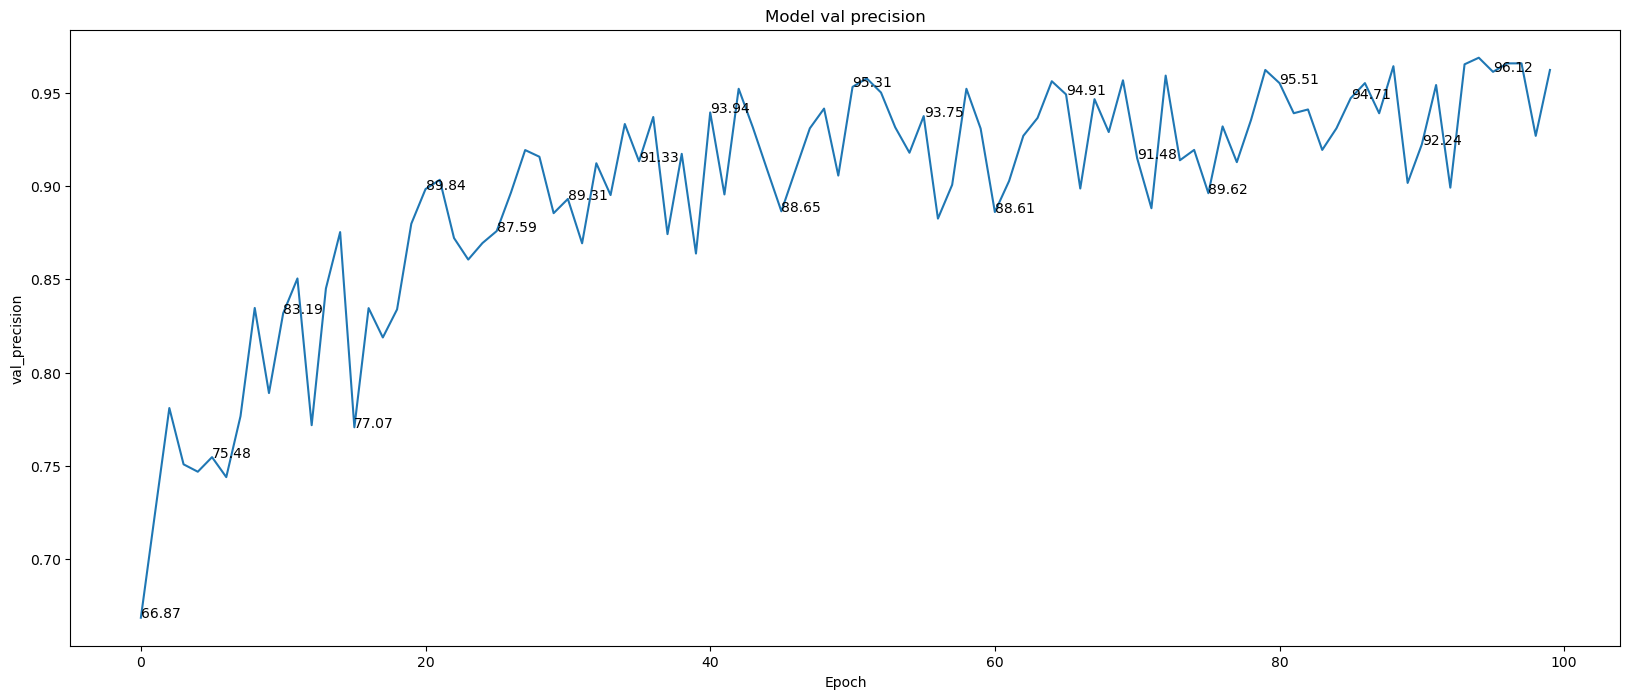

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))
plt.plot(WORKING.history['val_precision'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(WORKING.history['val_precision'][i]*100,2),xy=(i,WORKING.history['val_precision'][i]))

plt.title('Model val precision')
plt.ylabel('val_precision')
plt.xlabel('Epoch')
plt.show()